[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

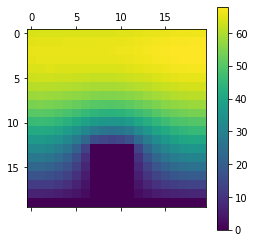

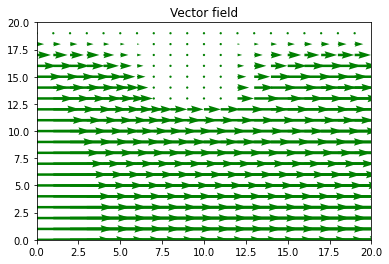

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Velocidad Inicial
v0=1
#h
h=1
#Número de iteraciones
nIter=1000
#Ancho malla
nx=20
#Alto malla
ny=20
#Alto Viga
altoViga=6
#Ancho Viga
anchoViga=3
#Punto de la malla donde inicia la viga en x
inicioVigaX=int((nx-anchoViga)/2)
#Punto de la malla donde termina la viga en x
finalVigaX=int((nx+anchoViga)/2)
#Punto de la malla donde termina la viga en y (la viga nace en ny)
finalVigaY=ny-altoViga
#Velocidad en el eje x
vx=np.zeros((ny,nx))
#Velocidad en el eje y
vy=np.zeros_like(vx)
matrizRedondeada=np.zeros_like(vx)
#Presión
constantePresión=0.5
p=np.zeros_like(vx)

#Condiciones para el sistema matricial
A = np.full((nx*ny, nx*ny), 0.0)
b = np.zeros((nx*ny))
C = np.full((nx*ny, nx*ny), 0.0)
d = np.zeros((nx*ny))

def inicializarMatriz():
    j = 1
    i = 0
    for k in range(nx,nx*ny-nx): 
        A[k,k] = 1
        A[k,k-nx] = -(h*vx[j,i]/8 + 0.25)
        A[k,k-1] = -(h*vy[j,i]/8 + 0.25)
        A[k,k+1] = h*vy[j,i]/8 - 0.25
        A[k,k+nx] = h*vx[j,i]/8 - 0.25
        i += 1
        if i==nx:
            i=0
            j+=1
    


b[:] = (h/2) * constantePresión

def condicionesIniciales():
    #surface
    for k in range(nx):
        b[k] = v0*h
        A[k,k] = -1
        A[k,k+nx] = 1
    #EA
    for k in range(nx*ny - nx, nx*ny):
        b[k] = 0
        A[k,k] = 1
    #inlet
    for k in range(nx, nx*ny-nx, nx): #u[j,i+1]-u[j,i]=0
        b[k] = 0
        A[k,:k] = 0
        A[k,k+1:] = 0
        A[k, k] = -1
        A[k, k+1] = 1
    #outlet
    for k in range(nx*2-1,nx*ny-nx ,nx): #u[j,i]-u[j,i-1]=0
        b[k] = 0
        A[k,:k-1] = 0
        A[k,k:] = 0
        A[k,k-1] = -1
        A[k, k] = 1
    #viga
    #print((ny*nx)-(altoViga*nx)+inicioVigaX, ny*nx, nx)
    for k in range((ny*nx)-(altoViga*nx)+inicioVigaX, ny*nx, nx):
        for l in range(k,k+anchoViga):
            b[l] = 0
            A[l,:l] = 0
            A[l,l:] = 0
            A[l, l] = 1
        #Lado D de la viga
        b[k-1] = 0
        A[k-1,k-1:] = 0
        A[k-1,:k-1] = 0
        A[k-1,k-1] = 1
        #Lado B de la viga
        b[k+anchoViga] = 0
        A[k+anchoViga,k+anchoViga:] = 0
        A[k+anchoViga,:k+anchoViga] = 0
        A[k+anchoViga,k+anchoViga] = 1
    #Lado C de la viga
    posC = (ny*nx)-((altoViga+1)*nx)+inicioVigaX-1
    for k in range(posC, posC+anchoViga+2):
        b[k] = 0
        A[k,:k] = 0
        A[k,k:] = 0
        A[k,k] = 1
    
        


        


def condiciones():
    #Condiciones de frontera
    #inlet  
    vx[:ny, 0]=vx[:ny, 1]
    vy[:ny ,0]= 0
    #outlet
    vx[:ny, nx-1]=vx[:ny,nx-2]
    vy[:ny,nx-1]=vy[:ny,nx-2]
    #surface
    vx[0,:nx]=v0
    vy[0,:nx]=0
    #E line
    vx[ny-1,:inicioVigaX-1]=0
    vy[ny-1,:inicioVigaX-1]=0
    #A line
    vx[ny-1,finalVigaX+2:nx]=0
    vy[nx-1,finalVigaX+2:nx]=0
    # #Viga
    # vx[finalVigaY:ny,inicioVigaX:finalVigaX+1]=0
    # vy[finalVigaY:ny,inicioVigaX:finalVigaX+1]=0
    # #Viga's back
    # vx[finalVigaY:ny,inicioVigaX-1]=0
    # vy[finalVigaY:ny,inicioVigaX-1]=(-2*(vx[finalVigaY:ny,inicioVigaX-2]-vx[finalVigaY:ny,inicioVigaX-1]))/(h*h)
    # #Viga's top
    # vx[finalVigaY-1,inicioVigaX:finalVigaX+1]=0
    # vy[finalVigaY-1,inicioVigaX:finalVigaX+1]=(-2*(vx[finalVigaY-2,inicioVigaX:finalVigaX+1]-vx[finalVigaY-1,inicioVigaX:finalVigaX+1]))/(h*h)
    # #Viga's front
    # vx[finalVigaY:ny,finalVigaX+1]=0
    # vy[finalVigaY:ny,finalVigaX+1]=(-2*(vx[finalVigaY:ny,finalVigaX+2]-vx[finalVigaY:ny,finalVigaX+1]))/(h*h)
    for j in range(ny):
        for i in range(nx):
            matrizRedondeada[j][i]=round(vx[j][i],2)

condiciones()  
inicializarMatriz()
condicionesIniciales()
print(vx)
print(A)
print(b) 




def seidel(a, x ,b):
    #Finding length of a(3)       
    n = len(a)                   
    # for loop for 3 times as to calculate x, y , z
    for j in range(0, n):        
        # temp variable d to store b[j]
        d = b[j]                         
        # to calculate respective xi, yi, zi
        for i in range(0, n):     
            if(j != i):
                d-=a[j][i] * x[i]
        # updating the value of our solution         
        x[j] = d / a[j][j]
    # returning our updated solution           
    return x 

n = nx*ny
xres = np.zeros((nx*ny))
for i in range(250):
   # condicionesIniciales()
    xres = seidel(A, xres, b)

def vector_matriz():
    rowToFill=0
    for i in range(len(xres)):
        if i%nx==0 and i!=0:
            rowToFill += 1
        vx[rowToFill, i-rowToFill*nx] = xres[i]
    #print(vx)

vector_matriz()

x=np.zeros_like(vx)
y=np.zeros_like(vx)
for j in range(ny):
    for i in range(nx):
        x[j][i]=i
        y[j][i]=ny-j
#Mapa de calor
def prueba(m):
    dfAGraficar=pd.DataFrame(m)
    plt.matshow(dfAGraficar)
    plt.colorbar()
    plt.show()
prueba(vx)

#Hacer la gráfica bidimensional del campo de velocidad
def graficar():
    for i in range(ny):
        for j in range(nx):
            # Vector origin location
            X = [j]
            Y = [i]
            # Directional vectors
            U = vx[i][j]
            V = vy[i][j]
            # Creating plot
            plt.quiver(X, Y, U, V, color='g', units='xy', scale=12)
            plt.title('Vector field')
    # x-lim and y-lim
    plt.xlim(0, nx)
    plt.ylim(0, ny)

    # Show plot with grid
    #plt.grid()
    plt.show()
graficar()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09c38f6a-ca5d-4494-bbde-d245b4951523' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>